<a href="https://colab.research.google.com/github/Tushaam/JAX-tutorials/blob/main/Neural_network_JAX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Now that we have gotten our hands dirty with JAX basics let us start with coding a simple neural network from scratch

In [1]:
import jax.numpy as jnp


In [2]:
from jax import grad, jit, random

X = jnp.array([[1.0], [2.0], [3.0], [4.0]])
y = jnp.array([[5.0], [10.0], [15.0], [20.0]])

# let us make a random value

key = random.PRNGKey(0)


The jax.random.PRNGKey() function is used to generate random numbers in JAX, but unlike NumPy's np.random.randn(), it follows a pure functional approach.

In NumPy, np.random.randn() relies on a global hidden state, so calling it multiple times—even with the same seed—will generate different outputs unless the seed is manually reset before each call.

On the other hand, JAX's random.PRNGKey(seed) produces deterministic outputs for the same seed, and it requires explicitly passing and splitting keys to manage randomness. This makes JAX's randomness **reproducible**.

In [3]:
params = {
    "W1": random.normal(key, (1, 4)),
    "b1": jnp.zeros((1, 4)),
    "W2": random.normal(key, (4, 1)),
    "b2": jnp.zeros((1, 1))
}

We have initialised all the weights and biases randomly

This is a simple example so i am just taken 2 layers for the network

In [6]:
def relu(x):
    return jnp.maximum(0, x)

ReLU is the most common choice for hidden layer activation functions
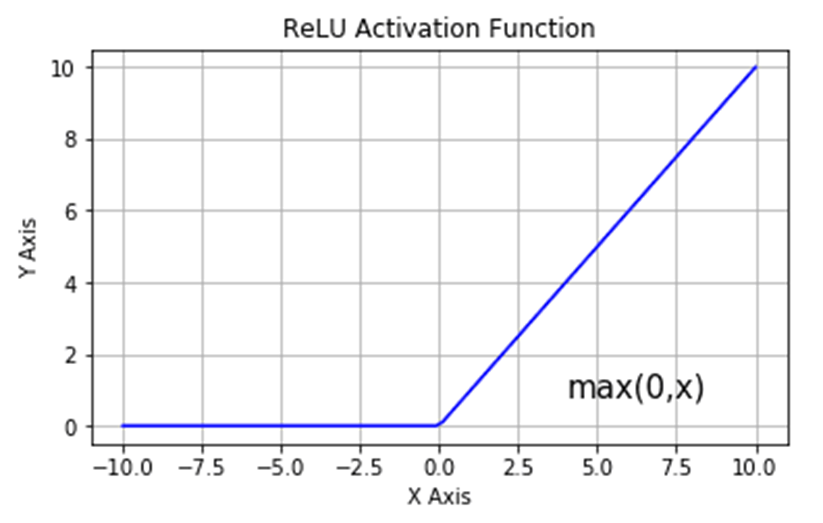


Image credit: https://www.nomidl.com/wp-content/uploads/2022/04/image-10.png

# Lets start now with forward pass

In [10]:
def forward(params, x):
    z1 = jnp.dot(x, params["W1"]) + params["b1"]
    a1 = relu(z1)
    z2 = jnp.dot(a1, params["W2"]) + params["b2"]
    return z2

def loss_fn(params, x, y):
    preds = forward(params, x)
    return jnp.mean((preds - y) ** 2)

We are first calculating z= wx + b then using relu function to get the output which will be passed to 2nd layer as its input

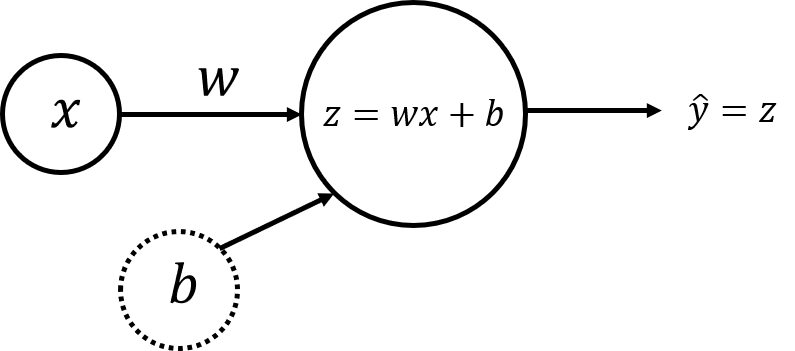

Image credit: https://raw.githubusercontent.com/Ryota-Kawamura/Mathematics-for-Machine-Learning-and-Data-Science-Specialization/1a5a79553a3e2b26a0acdcd408965793b947e347/Course-1/Week-3/images/nn_model_linear_regression_simple.png

And then we are computing the loss using Mean Squared Error(MSE) as:

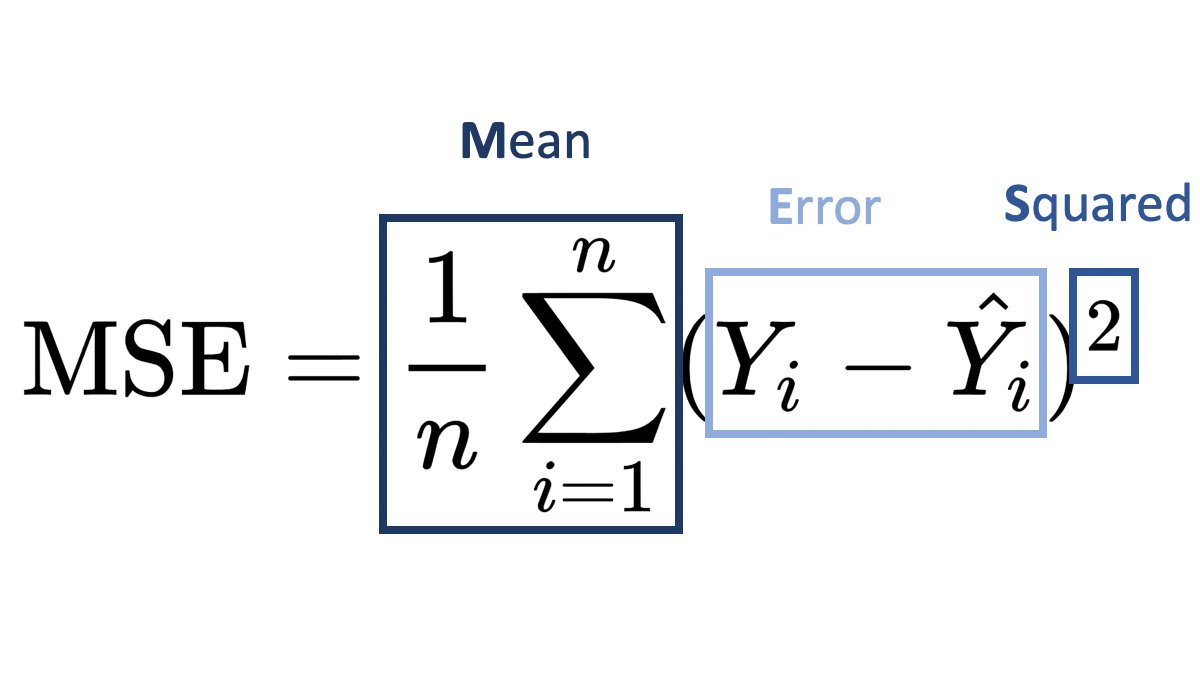

Image Credit:https://suboptimal.wiki/images/mse_5.jpg

In [11]:
@jit
def update_params(params, x, y, lr=0.01):
    grads = grad(loss_fn)(params, x, y)
    return {k: params[k] - lr * grads[k] for k in params}

# Training loop
for epoch in range(100):
    params = update_params(params, X, y)
    if epoch % 10 == 0:
        l = loss_fn(params, X, y)
        print(f"Epoch {epoch}: Loss = {l:.3f}")

Epoch 0: Loss = 0.000
Epoch 10: Loss = 0.000
Epoch 20: Loss = 0.000
Epoch 30: Loss = 0.000
Epoch 40: Loss = 0.000
Epoch 50: Loss = 0.000
Epoch 60: Loss = 0.000
Epoch 70: Loss = 0.000
Epoch 80: Loss = 0.000
Epoch 90: Loss = 0.000


    grads = grad(loss_fn)(params, x, y)
This is just calculating the gradient of the loss function based on our original parameters

This computed gradient will be used to backpropogate and update the old parameters as:

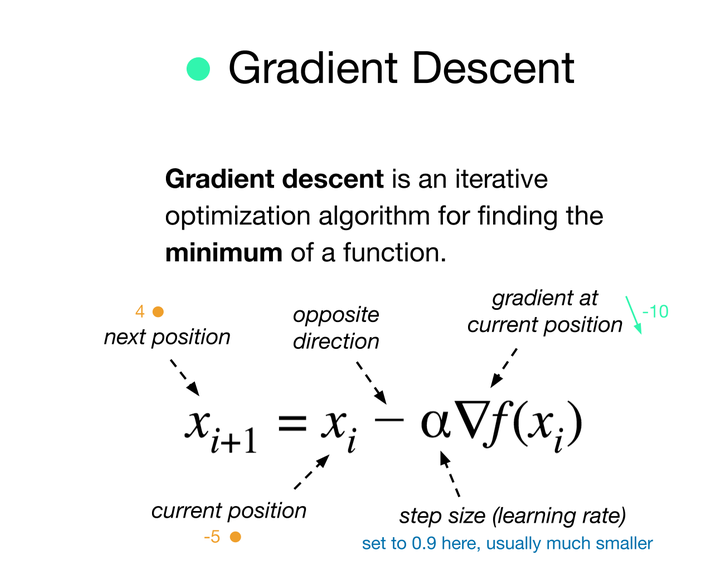

This is what we have done here: {k: params[k] - lr * grads[k] for k in params}

Image credit: https://user-images.githubusercontent.com/99672298/181736933-b8257ea0-c86a-4a7e-b188-b0b09c031643.png

In [12]:
preds = forward(params, X)
print("Final predictions:\n", preds)

Final predictions:
 [[ 4.999998]
 [ 9.999999]
 [15.      ]
 [20.000002]]


Our original actual data(stored in list y) was [5,10,15,20]

as we can our simple neural network is almost 100% effecient in predicting these true values.

Let us confirm this by using another important metric called as the Mean absolute error(MAE)

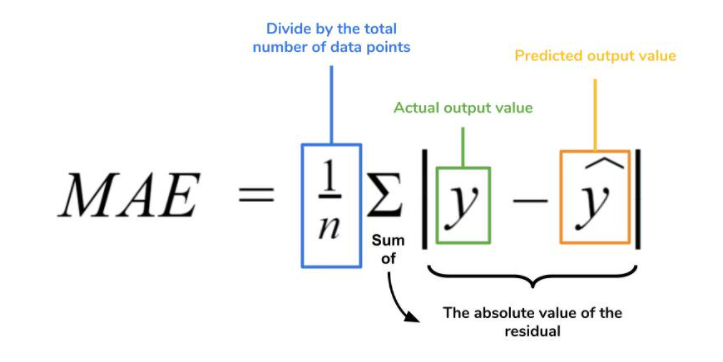

Image credit: https://miro.medium.com/v2/resize:fit:723/1*9BhnZiaHkApC-gQt3rYpMQ.png

In [13]:
def MAE(y,preds):
  return (jnp.mean(jnp.abs(y-preds)))


mae = MAE(y,preds)
print(f"The Mean Absolute Error is: {mae:.2f}")

The Mean Absolute Error is: 0.00


# BOOM 100% accuracy😆